In [1]:
import re
import pandas as pd

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("dataset.csv") 

In [5]:
df.head()

,text,intent
0,hi,greeting
1,hello,greeting
2,hey,greeting
3,good morning,greeting
4,good evening,greeting


In [ ]:
def clean_text(text: str) -> str:
    """Lowercase, remove punctuation and extra spaces"""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text) 
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [7]:
df["clean_text"] = df["text"].apply(clean_text)
df.head()

,text,intent,clean_text
0,hi,greeting,hi
1,hello,greeting,hello
2,hey,greeting,hey
3,good morning,greeting,good morning
4,good evening,greeting,good evening


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    df["clean_text"], df["intent"], test_size=0.2, random_state=42
)

print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")

Training samples: 52, Test samples: 14


In [9]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("Shape of training data:", X_train_vec.shape)
print("Shape of test data:", X_test_vec.shape)

Shape of training data: (52, 80)
Shape of test data: (14, 80)


In [10]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

print("Model training complete!")

Model training complete!


In [11]:
y_pred = model.predict(X_test_vec)

In [12]:
for i in range(10):
    print(f"Text: {X_test.iloc[i]}")
    print(f"True Intent: {y_test.iloc[i]}, Predicted Intent: {y_pred[i]}")
    print("---")

Text: bye
True Intent: goodbye, Predicted Intent: booking
---
Text: who is your boss
True Intent: unknown, Predicted Intent: unknown
---
Text: hi
True Intent: greeting, Predicted Intent: booking
---
Text: features of this app
True Intent: about_app, Predicted Intent: unknown
---
Text: yo
True Intent: greeting, Predicted Intent: booking
---
Text: stupid question
True Intent: unknown, Predicted Intent: booking
---
Text: book appointment
True Intent: booking, Predicted Intent: booking
---
Text: sign in
True Intent: login, Predicted Intent: create_account
---
Text: random question
True Intent: unknown, Predicted Intent: booking
---
Text: join online session
True Intent: video_call, Predicted Intent: booking
---


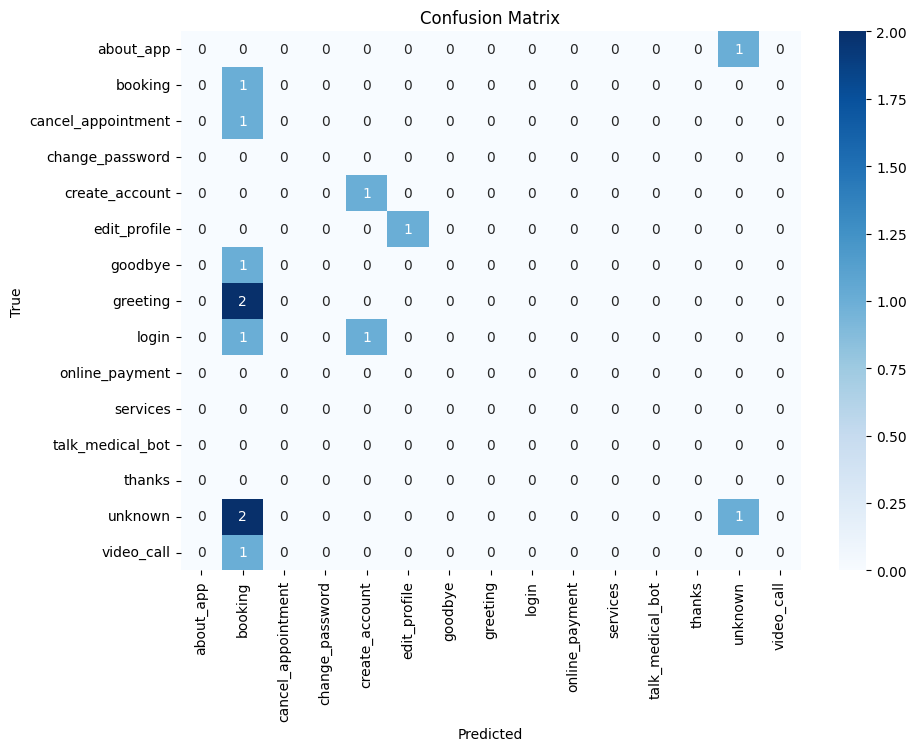

In [13]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=model.classes_, yticklabels=model.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [15]:
report = classification_report(y_test, y_pred, labels=model.classes_, zero_division=0 )
print("Classification Report:\n")
print(report)

Classification Report:

                    precision    recall  f1-score   support

         about_app       0.00      0.00      0.00         1
           booking       0.11      1.00      0.20         1
cancel_appointment       0.00      0.00      0.00         1
   change_password       0.00      0.00      0.00         0
    create_account       0.50      1.00      0.67         1
      edit_profile       1.00      1.00      1.00         1
           goodbye       0.00      0.00      0.00         1
          greeting       0.00      0.00      0.00         2
             login       0.00      0.00      0.00         2
    online_payment       0.00      0.00      0.00         0
          services       0.00      0.00      0.00         0
  talk_medical_bot       0.00      0.00      0.00         0
            thanks       0.00      0.00      0.00         0
           unknown       0.50      0.33      0.40         3
        video_call       0.00      0.00      0.00         1

          accu